Модель сети Хопфилда в синхронном режиме с дискретным состоянием и дескретным временем

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from random import random, randint, choice
from PIL import Image
from copy import deepcopy
from tqdm import tqdm

In [4]:
# data = pd.read_csv('data.csv')
# label = None
# while label in [None,0,1,2,3,4,5,6,7,8,9]:
#     num = randint(0,9999)
#     label, ex = np.array(data.iloc[num])[0], np.array(data.iloc[num])[1:]
# bipolar = np.vectorize(lambda x: 255 if x > 127 else 0)
# ex = bipolar(ex).reshape(28,28)
# plt.title(str(label) + "," + str(num))
# plt.imshow(ex, cmap='gray')
#-------------------------------------------
# im = Image.fromarray(ex.astype(np.uint8))
# im.save("Numbers/1.png")

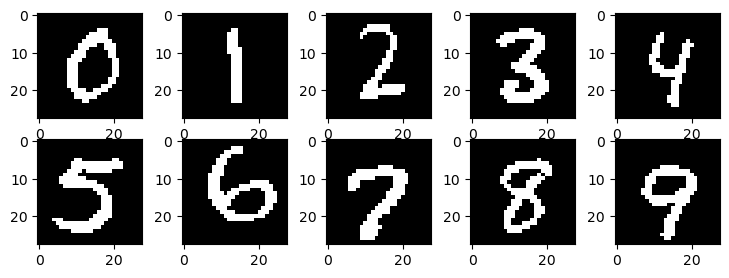

In [5]:
bipolar = np.vectorize(lambda x: 1 if x == 255 else -1)
data = []
for i in range(10):
    img = Image.open(f'Numbers/{i}.png')
    num = np.asarray(img)
    data.append(bipolar(num.reshape(784,1)))
plt.rcParams["figure.figsize"] = (9,3)
fig, axs = plt.subplots(2, 5)
for i in range(10):
    axs[i//5, i%5].imshow(data[i].reshape(28,28), cmap = 'gray')

In [59]:
class HopfieldNetwork:
    def __init__(self, data):
        self.data = data
        self.weights = np.zeros((784,784))
        
    def train_projections(self):
        for i in range(10):
            up = (self.weights@self.data[i] - self.data[i])@(self.weights@self.data[i] - self.data[i]).T
            self.weights += up/(self.data[i].T@self.data[i] - self.data[i].T@self.weights@self.data[i])
    
    def train_delta_projections(self, mu = 0.1):
        for _ in range(10):
            for i in range(10):
                self.weights += (mu/10)*((self.data[i] - self.weights@self.data[i])@self.data[i].T)
            
            
    def test(self, img):
        rez = self.weights@img
        for i in range(100):
            rez = self.weights@rez
        sign = np.vectorize(lambda x: -1 if x<0 else 1)
        return sign(rez)

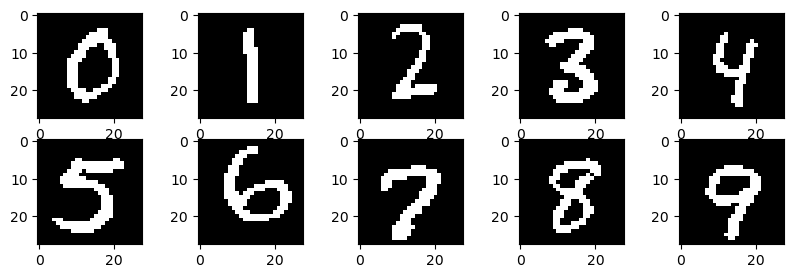

In [60]:
N = HopfieldNetwork(data)
N.train_projections()
fig, axs = plt.subplots(2, 5)
plt.rcParams["figure.figsize"] = (9,3)
for i in range(10):
    axs[i//5, i%5].imshow(N.test(data[i]).reshape(28,28), cmap = 'gray')

In [66]:
def noise(img, level = 0.1):
    add_noise = np.vectorize(lambda x: x if random()>level else choice([1,-1]))
    return add_noise(img)

def bipolar_noise(img, level = 0.1):
    add_noise = np.vectorize(lambda x: x if random()>level else -1*x)
    return add_noise(img)

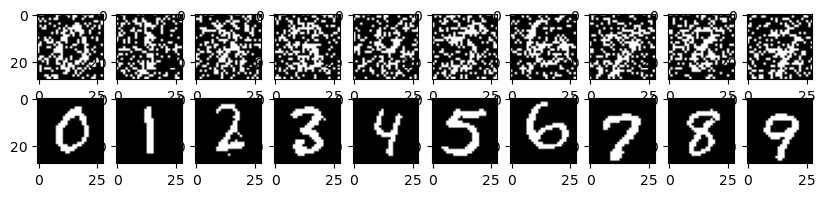

In [82]:
plt.rcParams["figure.figsize"] = (10,2)
fig, axs = plt.subplots(2, 10)
noise_level = 0.25 #percentage of transformed pixels
for i in range(10):
    noiseData = bipolar_noise(data[i], level = noise_level)
    axs[0, i].imshow(noiseData.reshape(28,28), cmap = 'gray')
    axs[1, i].imshow(N.test(noiseData).reshape(28,28), cmap = 'gray')